## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>BÀI 5. THUẬT TOÁN SẮP XẾP (1)</center>

In [6]:
# run this cell FIRST
import matplotlib.pyplot as plt

def show_list(arr, title=''):
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.bar(range(len(arr)), arr)
    ax.set_title(title)
    ax.set_xlabel('index')
    ax.set_xticks(range(len(arr)))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# 1. Selection Sort

**Bài toán**: Cho một dãy gồm *0 < n < 10<sup>6</sup>* số nguyên, mỗi số có giá trị trong khoảng [0, 10<sup>9</sup>], sắp xếp dãy trên theo thứ tự tăng dần.

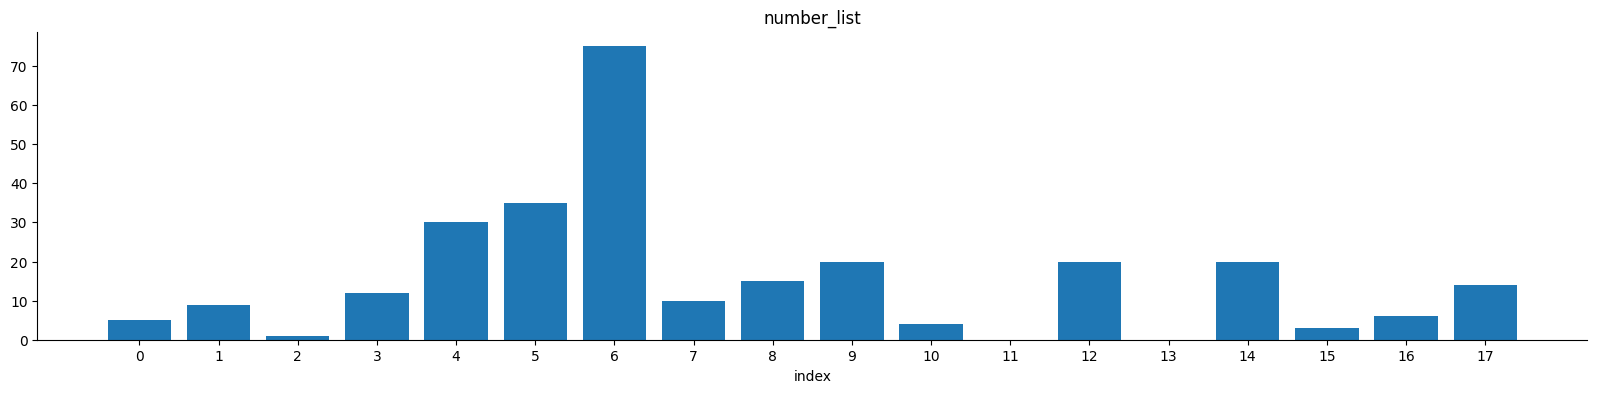

In [2]:
number_list = [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
show_list(number_list, title='number_list')

**Cách tiếp cận**:  
Selection Sort sử dụng cách tiếp cận đơn giản nhất:
- Tìm phần tử nhỏ nhất và chuyển lên đầu dãy.
- Sau đó, tiếp tục tìm phần tử nhỏ nhất trong phần còn lại của dãy và chuyển lên vị trí thứ hai.
- Tiếp tục như vậy đến khi hết dãy.  

Visualization: https://visualgo.net/en/sorting, thuật toán thứ hai.

In [7]:
# get the index of the smallest element, from the specified index to the end of list
def find_min(data_list, from_index):
    min_ind = from_index
    for i in range(from_index+1, len(data_list)):
        if data_list[i] < data_list[min_ind]:
            min_ind = i
    return min_ind


def selection_sort(data_list):
    for i in range(len(data_list)-1):
        min_ind = find_min(data_list, i)  # get the index of the min
        if min_ind != i:                  # swap current item and the min
            data_list[i], data_list[min_ind] = data_list[min_ind], data_list[i]

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


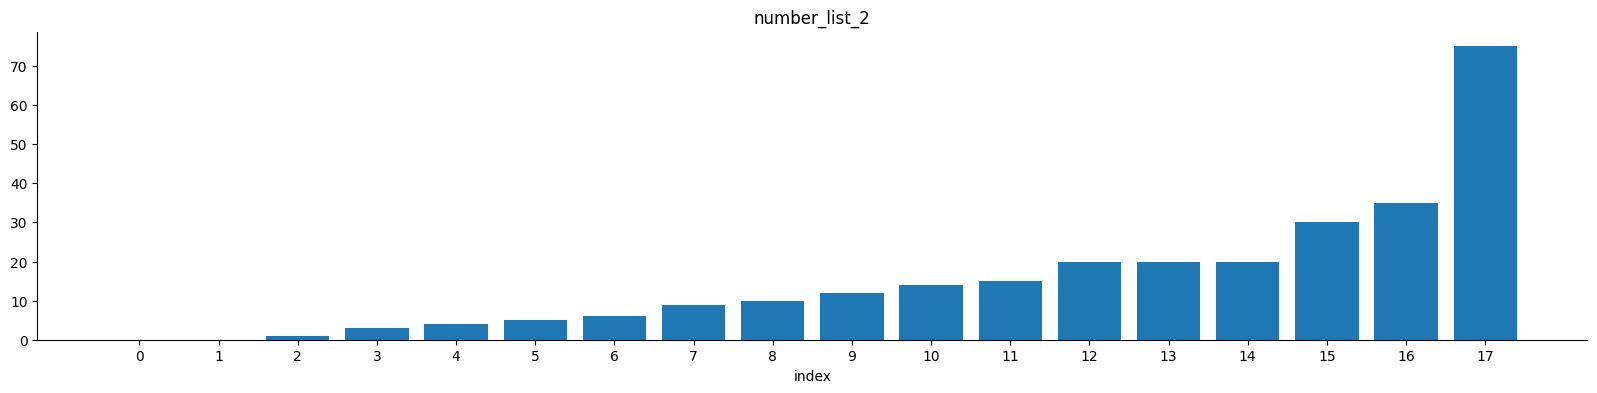

In [8]:
number_list_2 = number_list[:]  # shallow copy, only copy element references

selection_sort(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

**Cách hoạt động**:  
- Thuật toán Selection Sort chia danh sách cần sắp xếp thành 2 phần: đã được sắp xếp (nằm bên trái) và chưa được sắp xếp (bên phải).
- Ở mỗi lần lặp, thuật toán tìm phần tử nhỏ nhất của phần chưa sắp xếp để đưa vào cuối phần đã sắp xếp.  

**Độ phức tạp thời gian**:
- Thuật toán tìm min *n-1* lần. Lần thứ nhất tìm trên dãy có *n* phần tử, lần thứ hai trên *n-1* phần tử, lần thứ ba trên *n-2* phần tử,...  
- Bỏ qua các lệnh gán và swap (do mỗi lệnh có độ phức tạp *O(1)*), ta có thể tính xấp xỉ số câu lệnh thuật toán cần thực hiện là: \begin{equation} n + (n-1) + (n-2) + ... + 3 + 2 = \frac{(n+2)(n-1)}{2} = \frac{n^2+n-2}{2} \end{equation}
- Do đó, thuật toán Selection Sort có độ phức tạp về thời gian là *O(n<sup>2</sup>)*  

**Độ phức tạp không gian**:
- Thuật toán có độ phức tạp về không gian là *O(n)* để lưu trữ danh sách cần sắp xếp.

# 2. Bubble Sort

**Bài toán**: Bubble Sort (sắp xếp nổi bọt) cũng xử lý bài toán như Selection Sort, nhưng với cách tiếp cận khác.

Bubble Sort sử dụng **cách tiếp cận** sau:
- Xét lần lượt các cặp 2 phần tử liên tiếp. Nếu phần tử đứng sau nhỏ hơn phần tử đứng trước, ta đổi chỗ 2 phần tử đó.
- Giả sử ta xét các cặp theo thứ tự index (0, 1), (1, 2), (2, 3),... thì sau một lần xét qua dãy, phần tử có giá trị lớn nhất sẽ nằm ở cuối dãy.
- Như vậy, lúc này dãy cần sắp xếp cũng được chia thành 2 phần: đã được sắp xếp (nằm bên phải) và chưa được sắp xếp (bên trái). Ta tiếp tục thực hiện việc xét các cặp ở phần chưa được sắp xếp để đưa phần tử lớn nhất vào phần đã được sắp xếp.  

Bubble Sort có tên như vậy vì sau mỗi lượt xét các cặp ở phần chưa được sắp xếp, một phần tử sẽ "nổi lên" ở phần đã được sắp xếp. Ngoài ra, Bubble Sort còn có tên là Sinking Sort (chìm xuống).

Visualization: https://visualgo.net/en/sorting, thuật toán thứ nhất.

### Code:

In [9]:
def bubble_sort(arr):
    for i in range(len(arr)-1, 0, -1):  # i is the index between the sorted and unsorted part
        for j in range(i):              # loop j through the pairs in the unsorted part
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


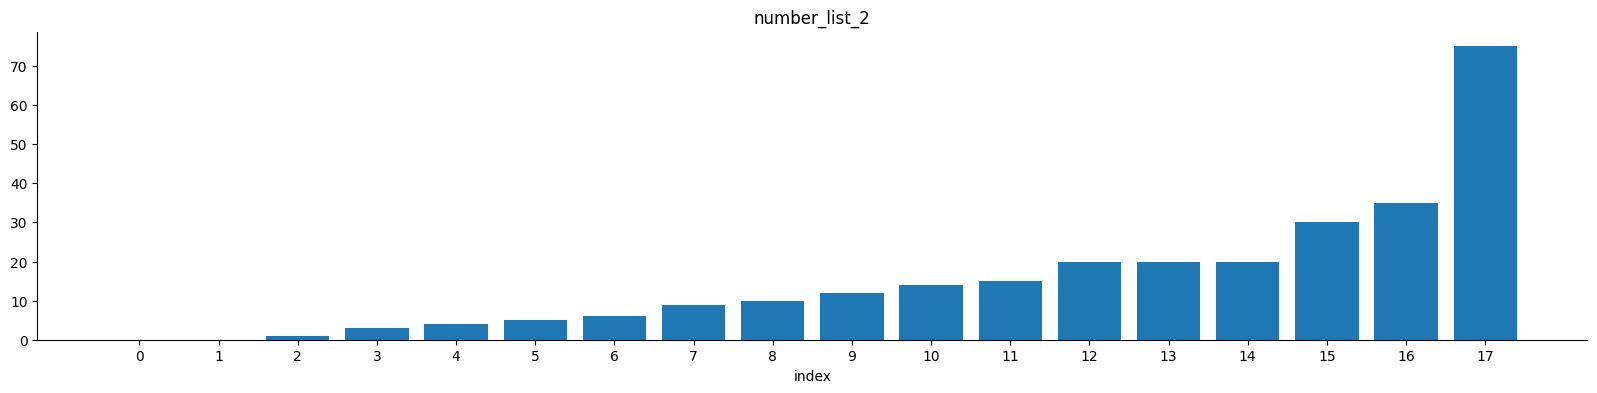

In [10]:
number_list_2 = number_list[:]

bubble_sort(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

**Độ phức tạp thời gian**:
- Thuật toán Bubble Sort chạy vòng lặp trên biến i *n-1* lần. Lần thứ nhất kiểm tra *n-1* cặp số, lần thứ hai kiểm tra *n-2* cặp, lần thứ ba *n-3* cặp,...
- Bỏ qua các lệnh gán và swap, ta có thể tính xấp xỉ số câu lệnh thuật toán cần thực hiện là: \begin{equation} (n-1) + (n-2) + ... + 2 + 1 = \frac{n(n-1)}{2} = \frac{n^2-n}{2} \end{equation}
- Do đó, thuật toán Bubble Sort có độ phức tạp về thời gian là *O(n<sup>2</sup>)*  


**Độ phức tạp không gian**:
- Thuật toán có độ phức tạp về không gian là *O(n)* để lưu trữ danh sách cần sắp xếp.

# 3. Insertion Sort

**Bài toán**: Insertion Sort (sắp xếp chèn) cũng là một cách tiếp cận khác của thuật toán sắp xếp.  

Insertion Sort sử dụng **cách tiếp cận** sau:
- Insertion sort cũng chia danh sách dữ liệu thành 2 phần: phần đã được sắp xếp nằm bên trái và chưa được sắp xếp nằm bên phải.
- Giả sử ta đã sắp xếp xong i phần tử của dãy. Ta tiếp tục sắp xếp bằng cách tìm vị trí phù hợp của phần tử thứ i+1 và "chèn" nó vào đó.
- Ta bắt đầu thuật toán bằng cách xem phần đã được sắp xếp là dãy gồm một phần tử đầu tiên, sau đó thực hiện chèn phần tử thứ 2, 3, 4,... vào dãy đã sắp xếp.

Visualization: https://visualgo.net/en/sorting, thuật toán thứ ba.

### Code:

In [20]:
def insertion_sort(arr):
    for i in range(1, len(arr)):  # arr[i] is the element to be inserted
        j = i
        while j > 0 and arr[j] < arr[j-1]:  # move the element to the left until found the correct position
            arr[j], arr[j-1] = arr[j-1], arr[j]
            j -= 1

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


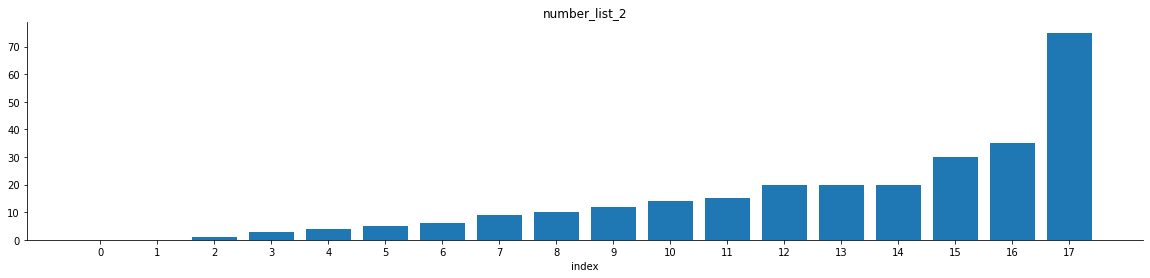

In [23]:
number_list_2 = number_list[:]

insertion_sort(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

**Độ phức tạp thời gian**:
- Độ phức tạp về thời gian của thuật toán Insertion Sort cũng là *O(n<sup>2</sup>)* do trong trường hợp xấu nhất (dãy được sắp xếp từ lớn đến nhỏ), thuật toán phải dịch chuyển mỗi phần tử về vị trí đầu tiên của dãy.
- Tuy nhiên, đối với dãy gần như đã theo thứ tự (ví dụ [1, 3, 5, 7, 6]), thuật toán này có tốc độ chạy gần với một thuật toán *O(n)*, do ta chỉ cần dịch chuyển một số ít phần tử. Ta có thể xem cách xử lý của thuật toán trong trường hợp này tại https://visualgo.net/en/sorting: Create -> Nearly Sorted.

**Độ phức tạp không gian**:
- Thuật toán có độ phức tạp về không gian là *O(n)* để lưu trữ danh sách cần sắp xếp.

# 4. Thực Hành

## 4.1. Selection Sort

**Yêu cầu**: Hiện thực thuật toán Selection Sort theo thứ tự từ nhỏ đến lớn mà không tách thành hai hàm như code mẫu trên bài học.

In [25]:
number_list = [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]

In [26]:
def selection_sort_v2(data_list):
    length = len(data_list)
    for i in range(length-1):
        min_ind = i
        for j in range(i+1, length):  # get the index of the min
            if data_list[j] < data_list[min_ind]:
                min_ind = j
        if min_ind != i:              # swap current item and the min
            data_list[i], data_list[min_ind] = data_list[min_ind], data_list[i]

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


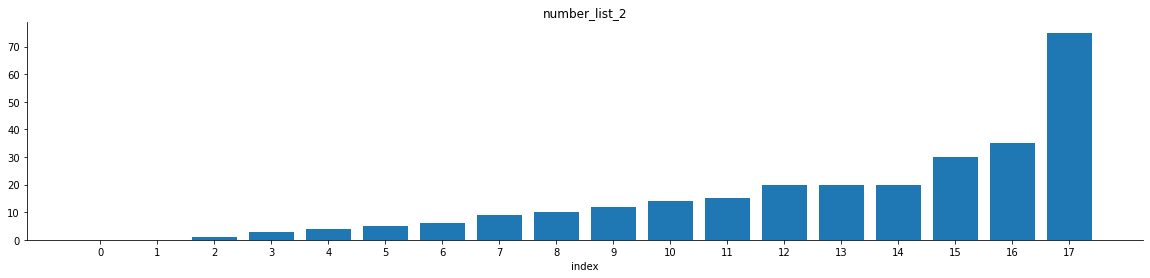

In [27]:
number_list_2 = number_list[:]

selection_sort_v2(number_list_2)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

## 4.2. Tăng Dần Hoặc Giảm Dần

**Yêu cầu**: Viết một hàm sử dụng thuật toán Bubble Sort để sắp xếp dãy số theo thứ tự tăng dần hoặc giảm dần. Hàm nhận tham số *ascending* với giá trị là *True* hoặc *False* để người sử dụng chọn tăng dần hoặc giảm dần. Hàm mặc định sắp xếp tăng dần nếu không nhận được tham số *ascending*.

In [28]:
# VERSION 1: Using lambda functions
def bubble_sort_optional(arr, ascending=True):
    
    # choose compare function base on "ascending"
    compare_func = None
    if ascending:
        compare_func = lambda num1, num2: num1 > num2
    else:
        compare_func = lambda num1, num2: num1 < num2
    
    # bubble sort
    for i in range(len(arr)-1, 0, -1):  # i is the index between the sorted and unsorted part
        for j in range(i):              # loop j through the pairs in the unsorted part
            if compare_func(arr[j], arr[j+1]):
                arr[j], arr[j+1] = arr[j+1], arr[j]
                

# VERSION 2: Using normal functions
def is_bigger(num1, num2):
    return num1 > num2
def is_smaller(num1, num2):
    return num1 < num2

def bubble_sort_optional_v2(arr, ascending=True):
    
    # choose compare function base on "ascending"
    compare_func = None
    if ascending:
        compare_func = is_bigger
    else:
        compare_func = is_smaller
    
    # bubble sort
    for i in range(len(arr)-1, 0, -1):  # i is the index between the sorted and unsorted part
        for j in range(i):              # loop j through the pairs in the unsorted part
            if compare_func(arr[j], arr[j+1]):
                arr[j], arr[j+1] = arr[j+1], arr[j]

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [75, 35, 30, 20, 20, 20, 15, 14, 12, 10, 9, 6, 5, 4, 3, 1, 0, 0]


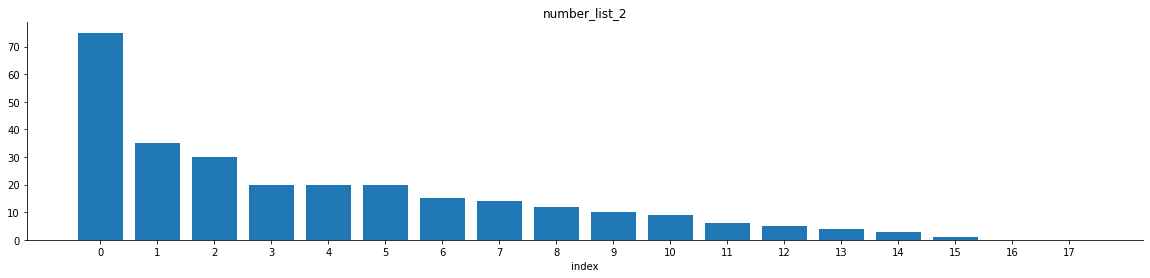

In [30]:
number_list_2 = number_list[:]

bubble_sort_optional_v2(number_list_2, ascending=False)

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

## 4.3. Bảng Thành Tích

Một cuộc thi lập trình online có 1000 thí sinh tham gia. Mỗi thí sinh chỉ được nộp bài 1 lần. Bài nộp sẽ được hệ thống chấm điểm và cập nhật trên bảng điểm chung cuộc. Bảng điểm chung cuộc được sắp xếp theo thứ tự điểm từ cao đến thấp. Mỗi lần xử lý, hệ thống sẽ cập nhật tối đa điểm của 5 thí sinh.

**Yêu cầu**: Cho bảng điểm hiện tại có không quá 1000 phần tử và danh sách điểm cần cập nhật có không quá 5 phần tử. Hãy cập nhật bảng điểm sao cho sau khi cập nhật, bảng điểm vẫn được công bố theo thứ tự điểm từ cao đến thấp. Điểm của mỗi thí sinh được lưu dưới dạng *(số báo danh, điểm)*.  

**Ví dụ**:  
- Input: *current_scores*, *updated_scores*
- Output: *result_scores*

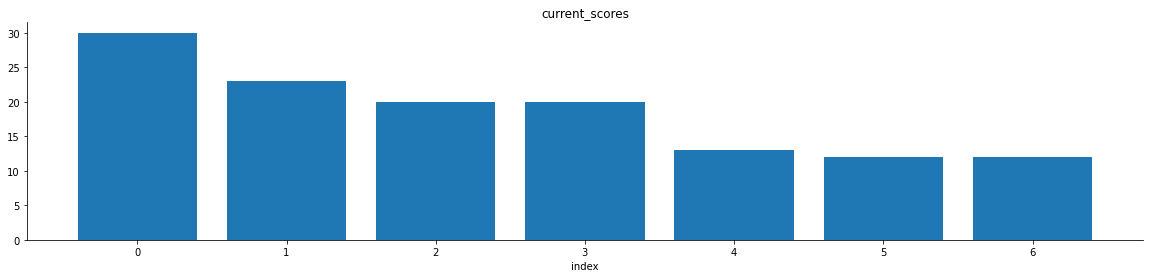

In [35]:
current_scores = [(324, 30), (257, 23), (111, 20), (345, 20), (897, 13), (667, 12), (909, 12)]
updated_scores = [(786, 20), (332, 25)]
result_scores = [(324, 30), (768, 25), (257, 23), (111, 20), (345, 20), (332, 20), (897, 13), (667, 12), (909, 12)]


show_list(list(zip(*current_scores))[1], 'current_scores')

In [34]:
def insertion_sort_highscores(arr1, arr2):
    
    # combine 2 arrays
    length1 = len(arr1)
    length2 = len(arr2)
    arr1.extend(arr2)
    
    # insertion sort from the start of arr2
    for i in range(length1, length1+length2):
        j = i
        while j > 0 and arr1[j][1] > arr1[j-1][1]:
            arr1[j], arr1[j-1] = arr1[j-1], arr1[j]
            j -= 1

Before update: [(324, 30), (257, 23), (111, 20), (345, 20), (897, 13), (667, 12), (909, 12)]
After update:  [(324, 30), (332, 25), (257, 23), (111, 20), (345, 20), (786, 20), (897, 13), (667, 12), (909, 12)]


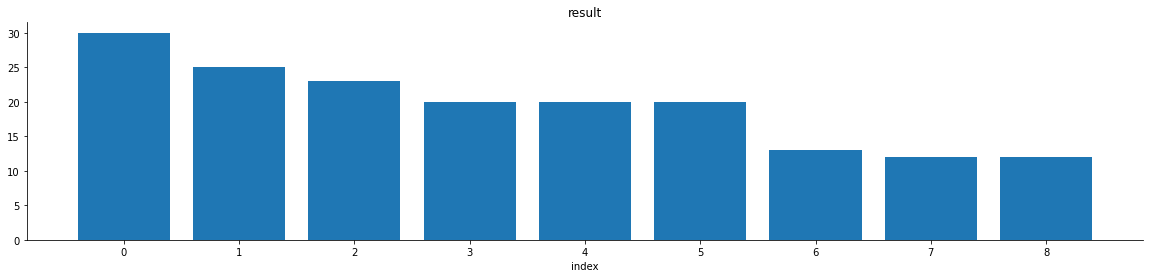

In [36]:
print("Before update: {}".format(current_scores))

insertion_sort_highscores(current_scores, updated_scores)

print("After update:  {}".format(current_scores))
show_list(list(zip(*current_scores))[1], 'result')